In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
k = 2
cent_change = 0.0001
max_iter = 300

In [3]:
colors = ['g','r','c','b','k','y']

In [100]:
def fit(data,k,max_iter,tol):
    
    centroids = {}
    for i in range(k):
        centroids[i] = data[i]
        print('k: ',k,' centroids[',i,'] ',centroids[i],' data[',i,'] ', data[i])
        
    for i in range(max_iter):
        classifications = {}
        print('classifications: ',classifications)
        
        for i in range(k):
            classifications[i] = [] 
            print('classifications[',i,'] ',classifications[i])
            
        for featureset in data:
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            print('distances: ',distances,' featureset: ',featureset,'centroids[centroid]',centroids,'[',centroid,']          ',centroids[centroid])
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)
            
        prev_centroids = dict(centroids)
        
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification], axis=0)
            
        optimized = True
        
        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid - original_centroid)/original_centroid*100.0) >tol:
                optimized = False
                
            if optimized:
                break
        return centroids,classifications

In [101]:
def predict(data,centroids):
    distances = [np.linalg.norm(data - centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification

In [102]:
x = np.array([[1,2],
            [1.5,1.8],
            [5,8],
             [1,0.6],
             [9,11]]
            )
print('x[:,0] ',x[:,0],'x[:,1]: ',x[:,1])

x[:,0]  [1.  1.5 5.  1.  9. ] x[:,1]:  [ 2.   1.8  8.   0.6 11. ]


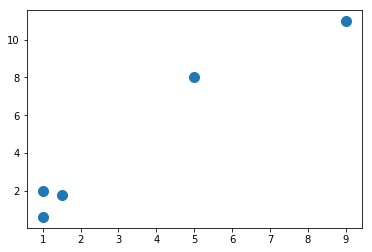

In [103]:
plt.scatter(x[:,0],x[:,1], s=100)

In [104]:
centroids,classifications = fit(x,k,max_iter,cent_change)

k:  2  centroids[ 0 ]  [1. 2.]  data[ 0 ]  [1. 2.]
k:  2  centroids[ 1 ]  [1.5 1.8]  data[ 1 ]  [1.5 1.8]
classifications:  {}
classifications[ 0 ]  []
classifications[ 1 ]  []
distances:  [0.0, 0.5385164807134504]  featureset:  [1. 2.] centroids[centroid] {0: array([1., 2.]), 1: array([1.5, 1.8])} [ 1 ]           [1.5 1.8]
distances:  [0.5385164807134504, 0.0]  featureset:  [1.5 1.8] centroids[centroid] {0: array([1., 2.]), 1: array([1.5, 1.8])} [ 1 ]           [1.5 1.8]
distances:  [7.211102550927978, 7.119691004531026]  featureset:  [5. 8.] centroids[centroid] {0: array([1., 2.]), 1: array([1.5, 1.8])} [ 1 ]           [1.5 1.8]
distances:  [1.4, 1.3]  featureset:  [1.  0.6] centroids[centroid] {0: array([1., 2.]), 1: array([1.5, 1.8])} [ 1 ]           [1.5 1.8]
distances:  [12.041594578792296, 11.869709347747316]  featureset:  [ 9. 11.] centroids[centroid] {0: array([1., 2.]), 1: array([1.5, 1.8])} [ 1 ]           [1.5 1.8]


In [105]:
centroids

{0: array([1., 2.]), 1: array([4.125, 5.35 ])}

In [81]:
classifications

{0: [array([1., 2.])],
 1: [array([1.5, 1.8]), array([5., 8.]), array([1. , 0.6]), array([ 9., 11.])]}

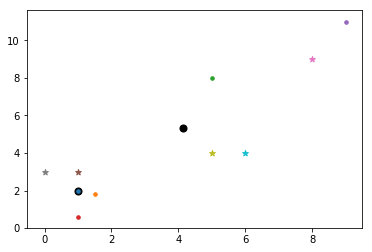

In [82]:
for class_1 in centroids:
    plt.scatter(centroids[class_1][0],centroids[class_1][1],marker='o',color='k',s=50)
    
for class_2 in classifications:
    color = colors[class_2]
    
    for featureset in classifications[class_2]:
        plt.scatter(featureset[0],featureset[1],marker='.',s=50)
        
x_test = np.array([[1,3],
                   [8,9],
                   [0,3],
                   [5,4],
                   [6,4],
                  ])

for test in x_test:
    classification = predict(test,centroids)
    plt.scatter(test[0],test[1],marker = '*')

In [62]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [63]:
wine = load_wine()
x = pd.DataFrame(wine.data, columns=wine.feature_names)

In [72]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [76]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [69]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [64]:
x = (x-x.min())/(x.max()-x.min())

In [65]:
xtrain,xtest = train_test_split(x,test_size=0.3)

In [66]:
f1 = 'hue'
f2 = 'proline'

basex = np.array(xtrain[[f1,f2]])
xtest = np.array(xtest[[f1,f2]])

In [67]:
centroids,classifications = fit(basex,k,max_iter,cent_change)

k:  2  centroids[ 0 ]  [0.49593496 0.35805991]  data[ 0 ]  [0.49593496 0.35805991]
k:  2  centroids[ 1 ]  [0.58536585 0.90513552]  data[ 1 ]  [0.58536585 0.90513552]


In [52]:
centroids

{0: array([0.54735772, 0.57082739]), 1: array([0.32303523, 0.22991814])}

In [53]:
classifications

{0: [array([0.61788618, 0.70399429]),
  array([0.67479675, 0.2510699 ]),
  array([0.52845528, 0.78245364]),
  array([0.62601626, 0.68259629]),
  array([0.49593496, 0.42938659]),
  array([0.64227642, 0.30813124]),
  array([0.49593496, 0.88231098]),
  array([0.43902439, 0.71825963]),
  array([1.        , 0.09201141]),
  array([0.44715447, 0.64693295]),
  array([0.5203252 , 0.70042796]),
  array([0.45528455, 0.53994294]),
  array([0.62601626, 0.45435093]),
  array([0.4796748 , 0.55777461]),
  array([0.56910569, 0.52924394]),
  array([0.76422764, 0.09129815]),
  array([0.47154472, 0.7253923 ]),
  array([0.52845528, 0.39372325]),
  array([0.6504065, 0.7360913]),
  array([0.55284553, 0.4700428 ]),
  array([0.62601626, 0.62196862]),
  array([0.51219512, 0.53994294]),
  array([0.58536585, 0.90513552]),
  array([0.43089431, 0.65049929]),
  array([0.6504065 , 0.31383738]),
  array([0.5203252 , 0.62196862]),
  array([0.4796748 , 0.70756063]),
  array([0.45528455, 0.56134094]),
  array([0.46341463

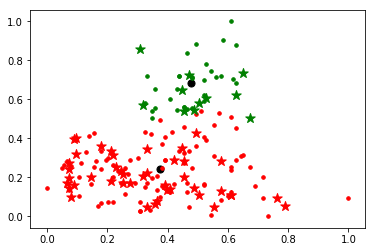

In [37]:
for centroid in centroids:
     plt.scatter(centroids[centroid][0],centroids[centroid][1],marker='o',color='k',s=50)
        
for classification in classifications:
    color = colors[classification]
    
    for next_datapoint in classifications[classification]:
        plt.scatter(next_datapoint[0],next_datapoint[1],marker = '.',color= color, s=50)
        
for test in xtest:
    classification = predict(test, centroids)
    plt.scatter(test[0],test[1],marker='*',color=colors[classification],s=100)
    